   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011/1/1       1   0     1        0        6           0   
1        2  2011/1/2       1   0     1        0        0           0   
2        3  2011/1/3       1   0     1        0        1           1   
3        4  2011/1/4       1   0     1        0        2           1   
4        5  2011/1/5       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


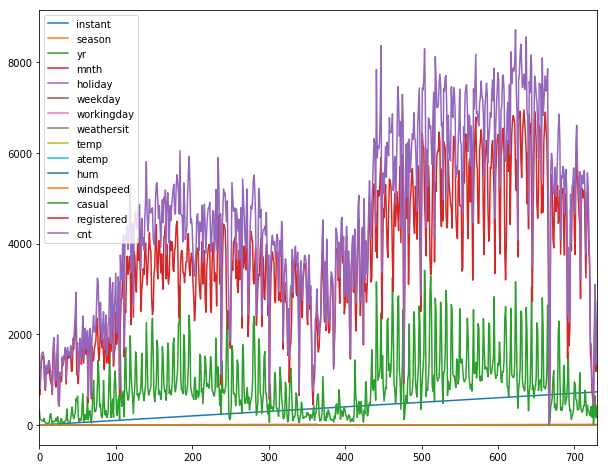

(731, 16)


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats


plt.rcParams['figure.figsize'] = (10,8)
df = pd.read_csv("day.csv")
print(df.head())
df.plot()
plt.show()

print(df.shape)



# Data Cleaning

In [2]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011/1/1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011/1/2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011/1/3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011/1/4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011/1/5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
df.duplicated().sum()

0

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           730 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           1
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##  Are there missing values?
We can see that in the column "hum", there are 730 non-null data, so there is 1 missing values, so there are several ways to handle missing values
* 1 Deletion
* 2 Dummy substitution
* 3 Mean substitution
* 4 Frequent substitution
* 5 Improve the data collector

So we choose the first way that is to delete the row of data where the hum data is null.



In [2]:
df_bak=df.copy()
df_bak.dropna(inplace=True)
df_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 730
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


In [3]:
df_bak.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
df_bak.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,366.491781,2.498630,0.501370,6.527397,0.028767,2.994521,0.683562,1.394521,0.495794,0.474718,0.628071,0.192990,849.135616,3659.315068,4508.450685
std,210.891284,1.110184,0.500341,3.448216,0.167266,2.004788,0.465405,0.544807,0.182841,0.162776,0.142446,0.102463,686.603041,1559.009189,1935.360433
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,184.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.338125,0.338045,0.520521,0.134950,316.250000,2502.250000,3169.750000
50%,366.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,0.627083,0.180975,717.000000,3664.500000,4548.500000
75%,548.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730313,0.233687,1096.500000,4783.250000,5966.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,2.000000,3410.000000,6946.000000,8714.000000


## Are there inappropraite values?
Since the 'temp', 'atemp', 'hum','windspeed' are normalized, so their range is 0 to 1, but we can see from the table that the max value of windspeed is 2, so we delete the row where the value of windspeed is more than 2.

In [5]:
df_bak = df_bak.drop(df[df.windspeed > 1].index)
df_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 730
Data columns (total 16 columns):
instant       729 non-null int64
dteday        729 non-null object
season        729 non-null int64
yr            729 non-null int64
mnth          729 non-null int64
holiday       729 non-null int64
weekday       729 non-null int64
workingday    729 non-null int64
weathersit    729 non-null int64
temp          729 non-null float64
atemp         729 non-null float64
hum           729 non-null float64
windspeed     729 non-null float64
casual        729 non-null int64
registered    729 non-null int64
cnt           729 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 96.8+ KB


## How is the data distributed?

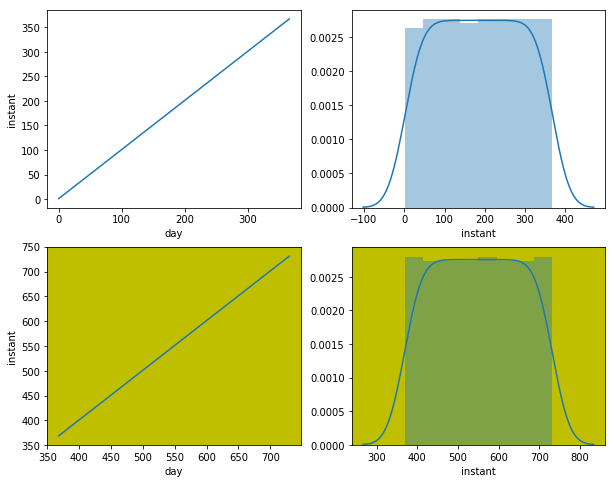

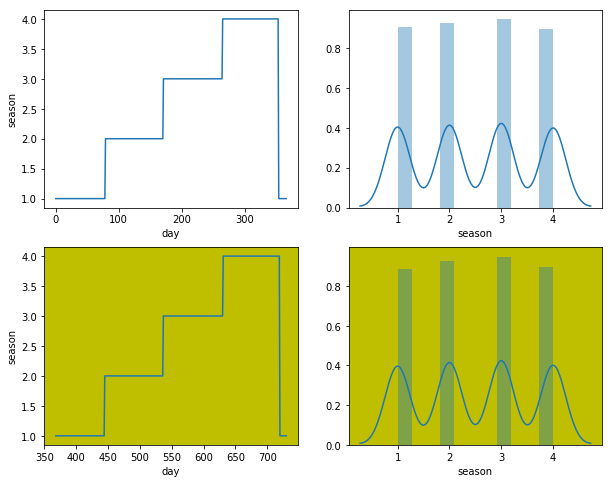

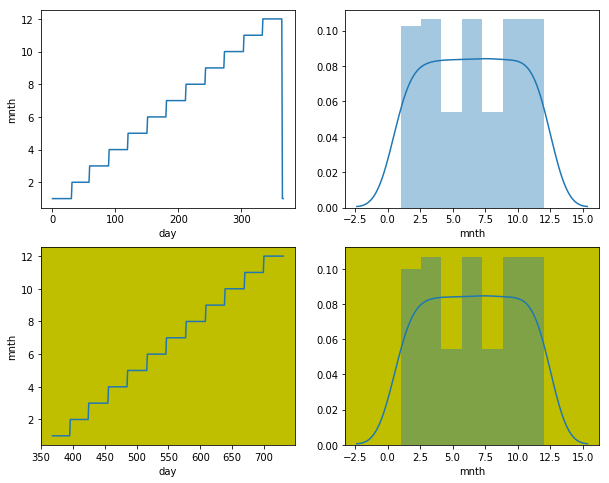

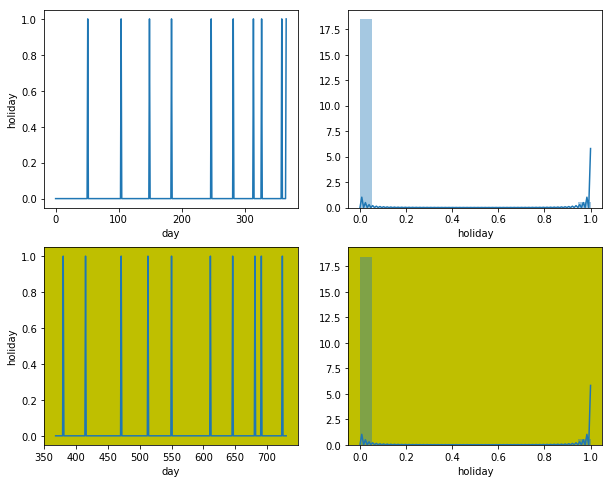

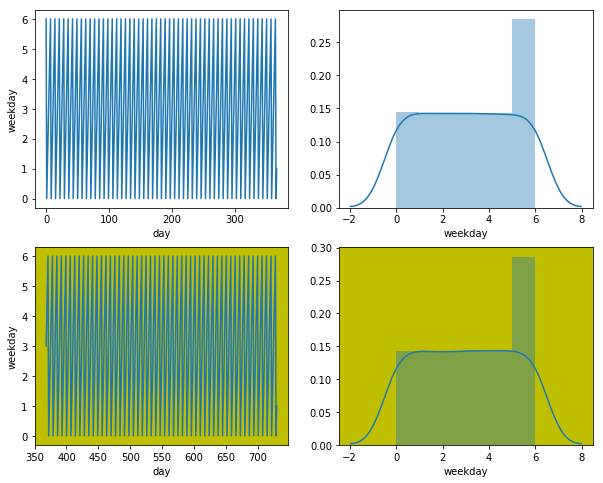

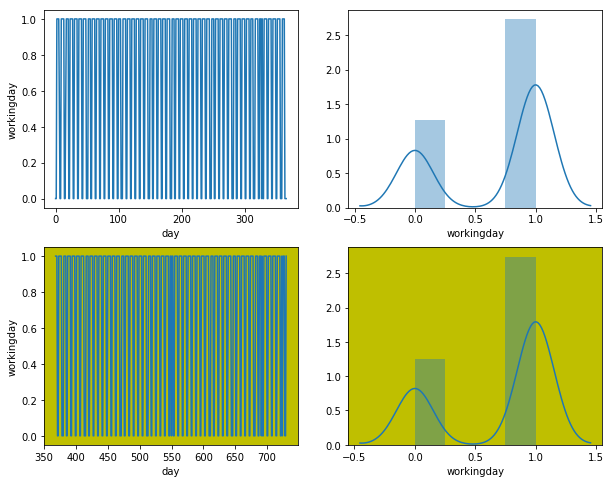

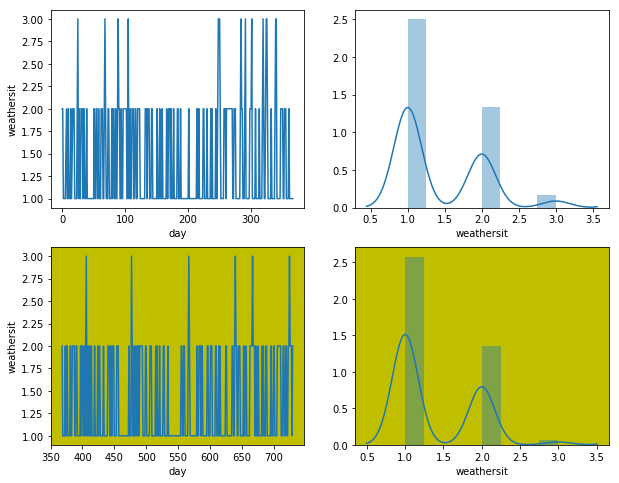

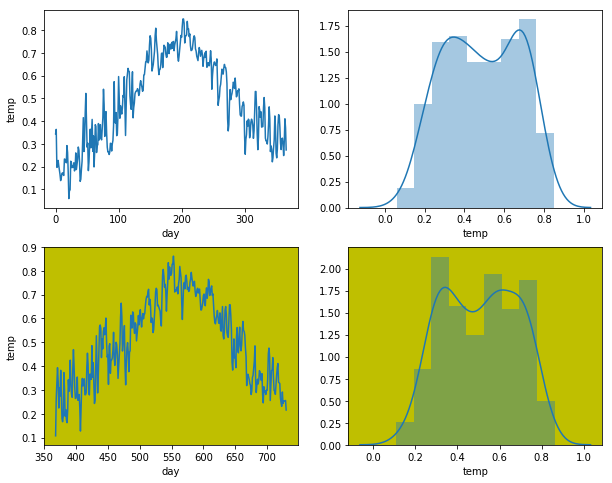

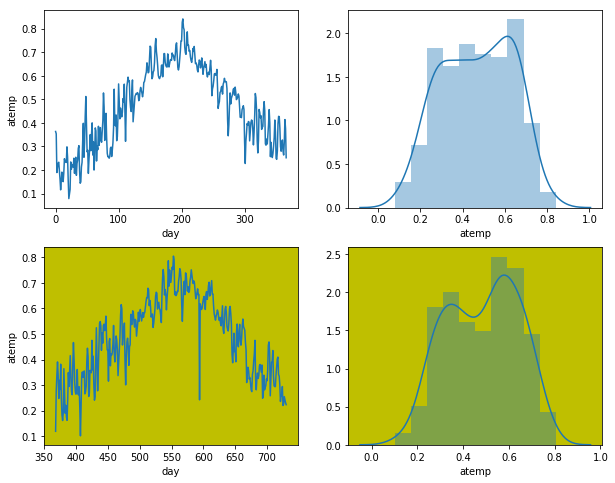

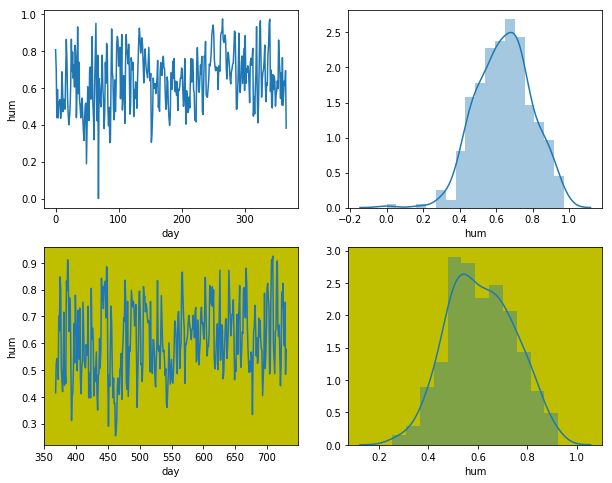

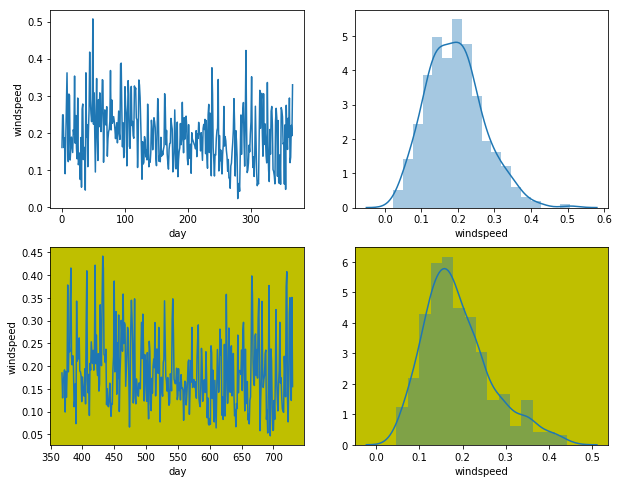

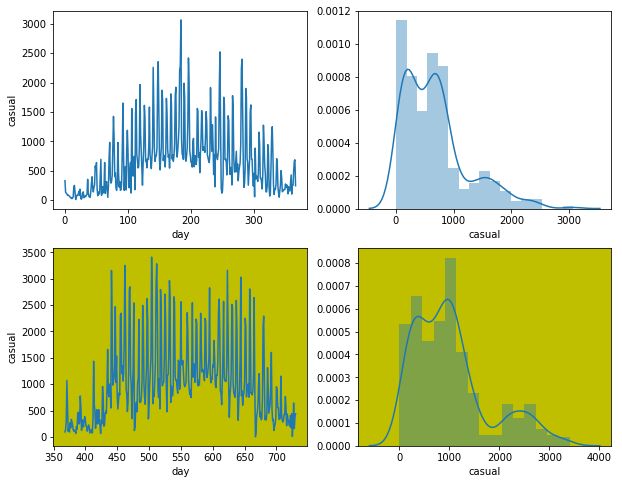

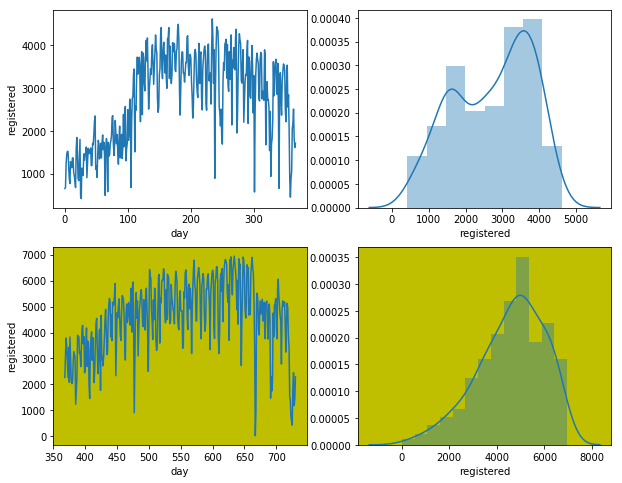

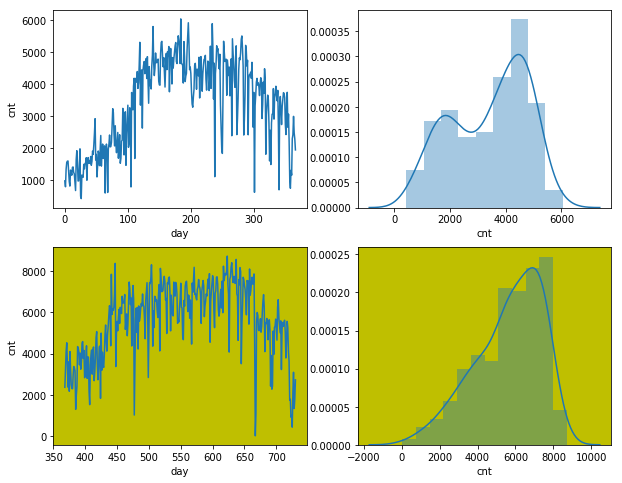

In [6]:
def show_distribution(df):
    for col in list(df.columns.values ):
        if(col != "dteday" and col !="yr" ):
            plt.subplot(221)
            plt.plot(df[col][0:365])
            plt.xlabel("day")
            plt.ylabel(col)
            plt.subplot(222)
            sns.distplot(df[col][0:365])
            plt.subplot(223,facecolor='y')
            plt.plot(df[col][366:729])
            plt.xlabel("day")
            plt.ylabel(col)
            plt.subplot(224, facecolor='y')
            sns.distplot(df[col][366:729])
            plt.show()
show_distribution(df_bak)
        

From the plot we can find that "instant" and "mnth","season" are Discrete uniform distribution, and "temp", "atemp", "hum", "windspeed" seem to belong the Normal Distribution, So we use **QQ-plot** and **scipy.normaltest** to test whether they are Normal Distribution or not.

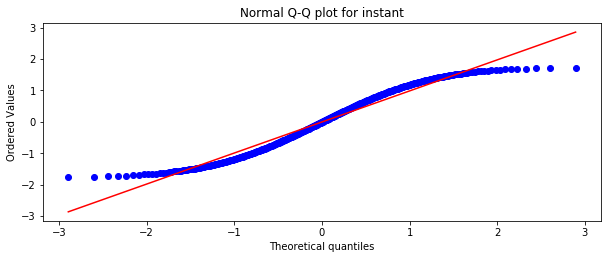

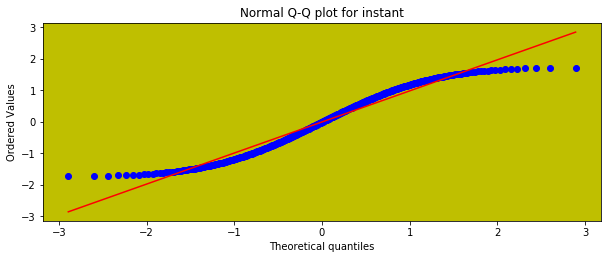

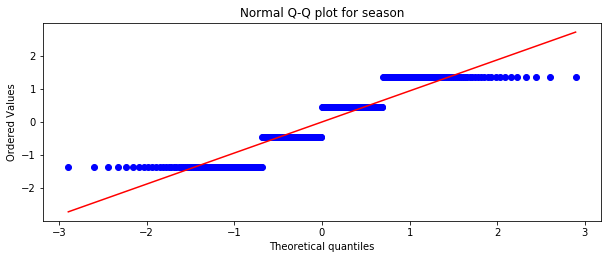

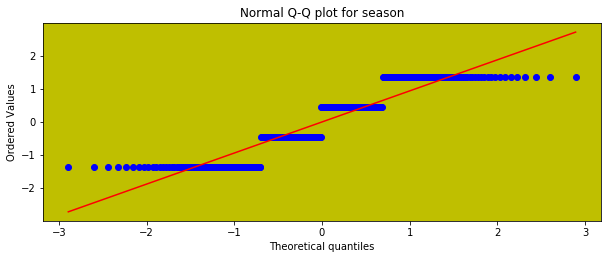

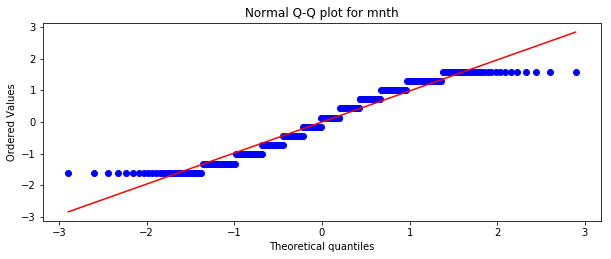

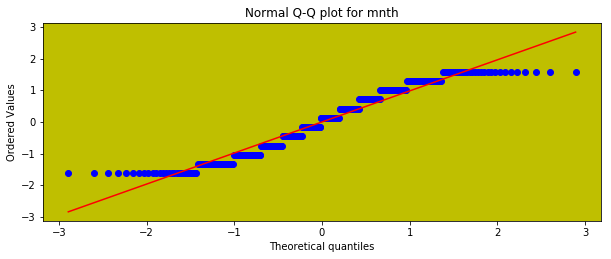

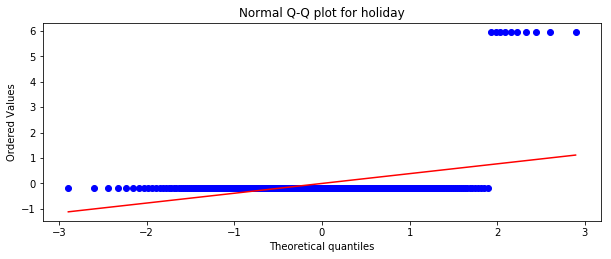

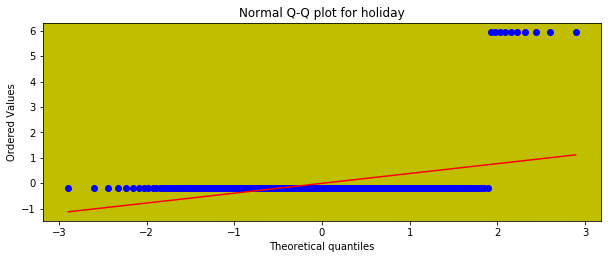

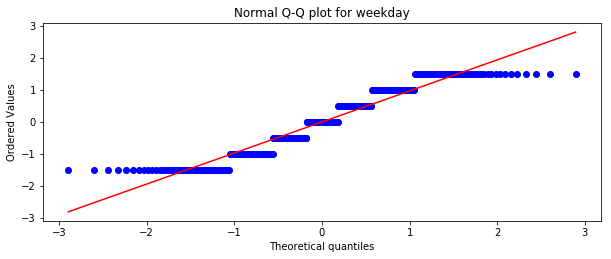

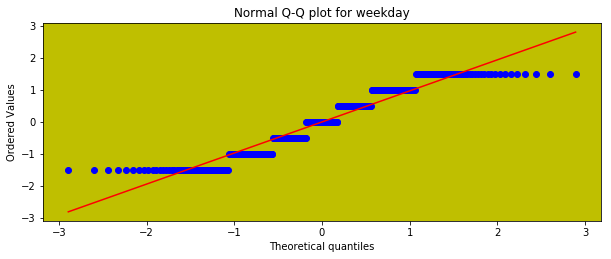

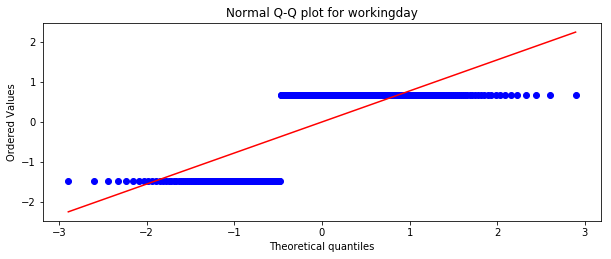

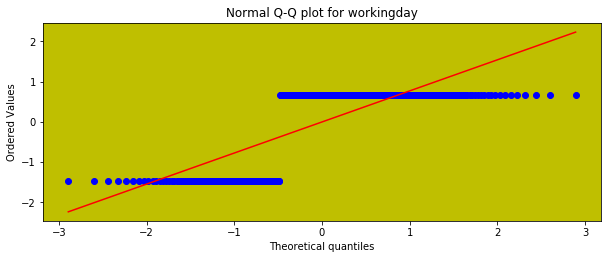

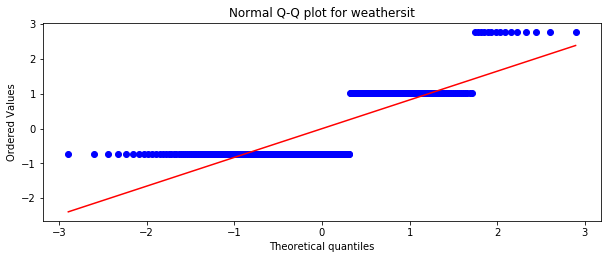

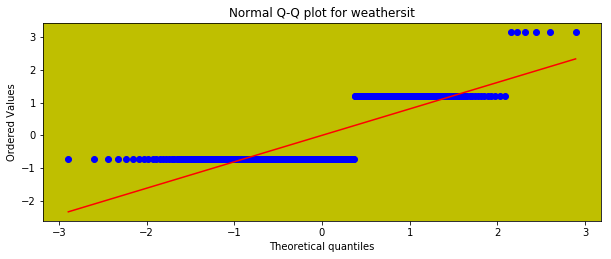

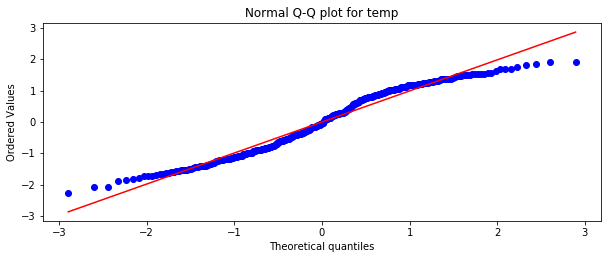

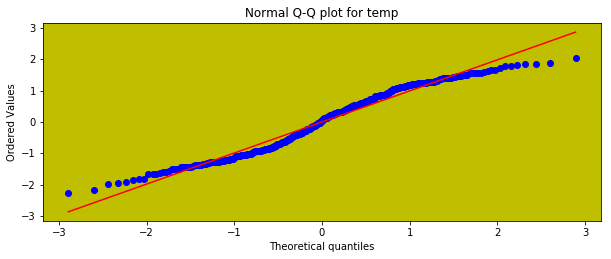

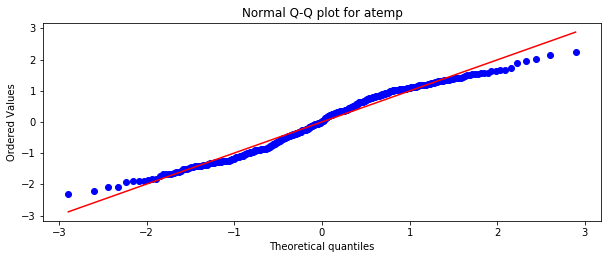

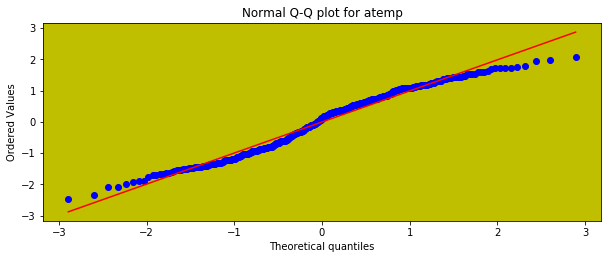

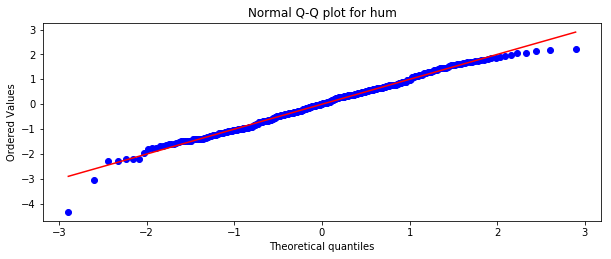

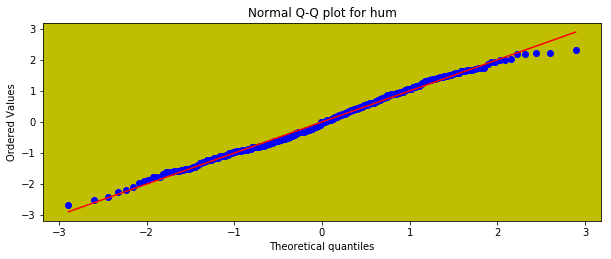

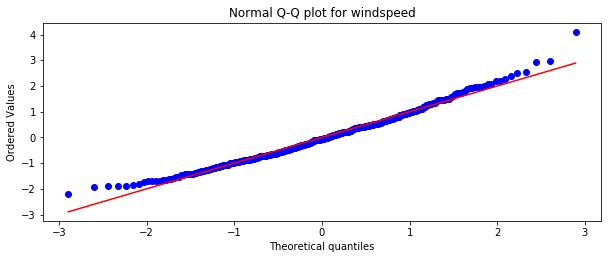

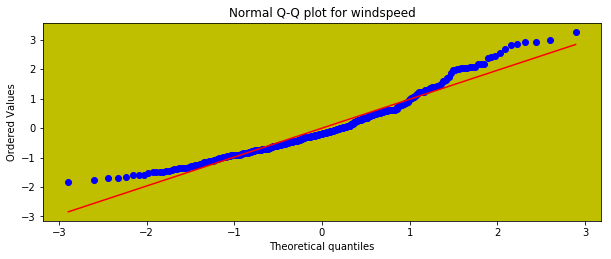

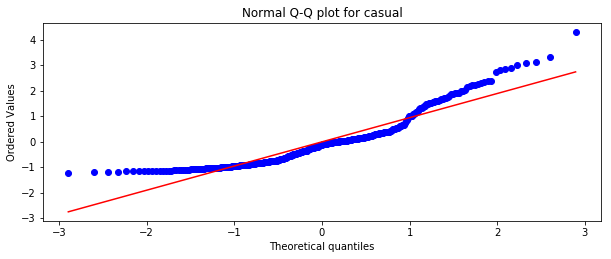

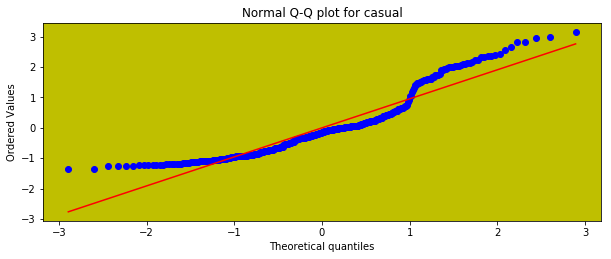

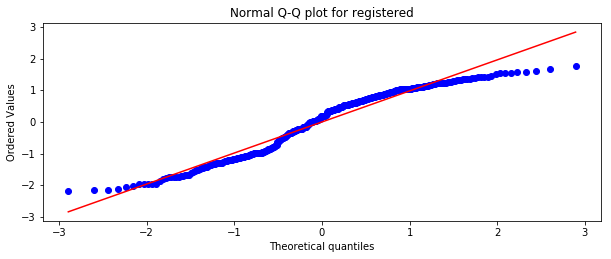

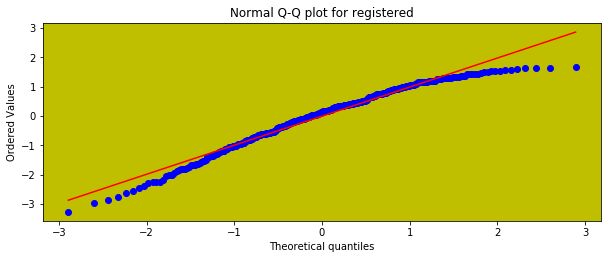

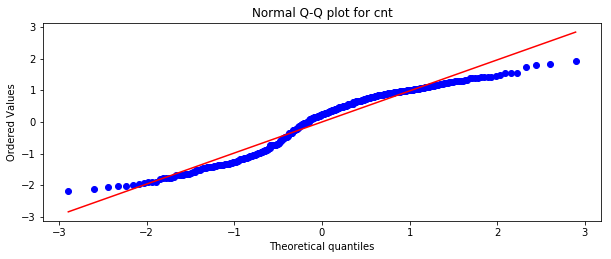

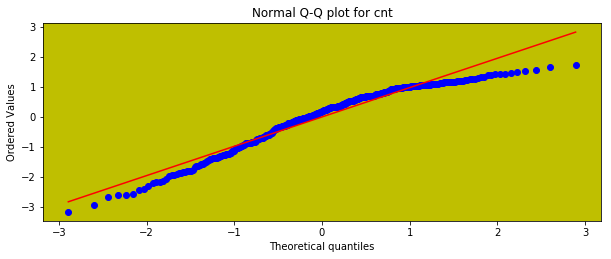

In [7]:
def qqplot_stats(obs, c):
    z = (obs-np.mean(obs))/np.std(obs)
    stats.probplot(z, dist="norm", plot=plt) 
    plt.title("Normal Q-Q plot for " + c)
    plt.show()
def qqplot_df(df):
    for col in list(df.columns.values):
        if(col != "dteday" and col != "yr"):
            plt.subplot(211)
            qqplot_stats(df[col][0:365], col)
            plt.subplot(212,facecolor='y')
            qqplot_stats(df[col][366:729], col)
qqplot_df(df_bak)

From the **QQ-plot**, we can find that "hum" and "windspeed" are more likely to be **Normal Distribution**, In order to further test whether they are in line with the normal distribution， we can use the **scipy.normaltest** to test.

In [9]:
def test(df):
    for col in list(df.columns.values):
        if(col != "dteday" and col != "yr"):
            w,p = stats.normaltest(df[col])
            alpha = 0.05
            if (p > alpha):
                print(col +" : " + "p = {:g}".format(p) + " :  Normal distribution")
            else:
                print(col +" : " + "p = {:g}".format(p) + " : Not normal distribution")
                
test(df_bak)

#print("p = {:g}".format(p))

instant : p = 1.69749e-109 : Not normal distribution
season : p = 0 : Not normal distribution
mnth : p = 3.72695e-116 : Not normal distribution
holiday : p = 5.71155e-180 : Not normal distribution
weekday : p = 2.04614e-171 : Not normal distribution
workingday : p = 0 : Not normal distribution
weathersit : p = 5.09099e-19 : Not normal distribution
temp : p = 2.22188e-63 : Not normal distribution
atemp : p = 3.23064e-31 : Not normal distribution
hum : p = 0.681492 :  Normal distribution
windspeed : p = 8.71738e-12 : Not normal distribution
casual : p = 1.55661e-32 : Not normal distribution
registered : p = 4.65179e-09 : Not normal distribution
cnt : p = 6.45673e-14 : Not normal distribution


From the **scipy.normaltest**, we can see that only "hum" meets the normal distribution

## What are the summary statistics?

#### Five number summaries:
Use df_bak.describe() function, we can get the mean, min, max, q1, q3 of each column

In [4]:
df_bak.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,366.971193,2.500686,0.502058,6.534979,0.027435,2.997257,0.684499,1.393690,0.496233,0.475126,0.628195,0.190511,850.139918,3663.123457,4513.263374
std,210.637639,1.109555,0.500339,3.444489,0.163459,2.004800,0.465034,0.544719,0.182582,0.162512,0.142505,0.077600,686.537684,1556.677850,1932.313023
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338362,0.520000,0.134950,317.000000,2506.000000,3190.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.487996,0.627500,0.180975,721.000000,3667.000000,4549.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.609229,0.730417,0.233221,1097.000000,4790.000000,5976.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Are there anomalies?
In the "**atemp**" figure, we can see that at about the 600th days, the feeling temperature suddenly dropped a lot, and there are also anomalies in the "**casual**", "**registered**","**cnt**" figure.

## Are any of the Columns correlated?

              season   holiday  weathersit      temp     atemp       hum  \
season      1.000000 -0.000104    0.023416  0.330182  0.338719  0.203270   
holiday    -0.000104  1.000000   -0.044335 -0.015430 -0.018836 -0.011359   
weathersit  0.023416 -0.044335    1.000000 -0.116105 -0.116996  0.594902   
temp        0.330182 -0.015430   -0.116105  1.000000  0.991639  0.123998   
atemp       0.338719 -0.018836   -0.116996  0.991639  1.000000  0.137046   
hum         0.203270 -0.011359    0.594902  0.123998  0.137046  1.000000   
windspeed  -0.230069  0.006006    0.039939 -0.159099 -0.184930 -0.249023   
casual      0.207368  0.064130   -0.244956  0.541378  0.541951 -0.079392   
registered  0.408122 -0.097545   -0.256811  0.536518  0.540643 -0.094897   
cnt         0.402461 -0.055798   -0.293919  0.624569  0.628095 -0.104657   

            windspeed    casual  registered       cnt  
season      -0.230069  0.207368    0.408122  0.402461  
holiday      0.006006  0.064130   -0.097545 -0.0557

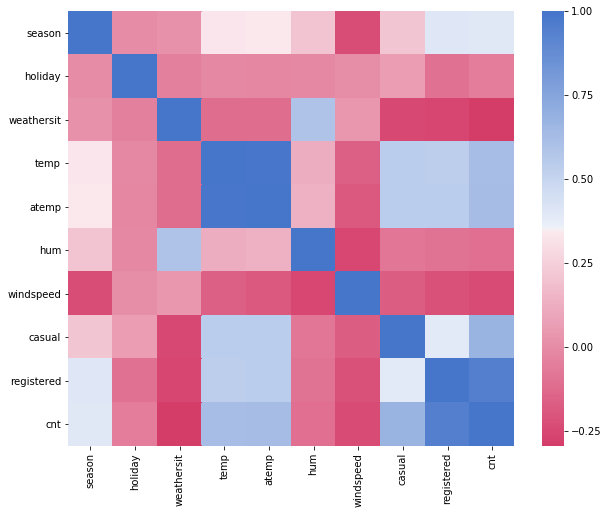

In [10]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations = df_bak[['season','holiday', 'weathersit', 'temp', 'atemp','hum','windspeed','casual','registered','cnt']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

From the heat map, we can find that the "**casual**", "**registered**","**cnt**" are **positive related** with "**temp**" and "**atemp**" ,but they are **negative related** with "**holiday**" ,"**weathersit**","**hum**","**windspeed**".

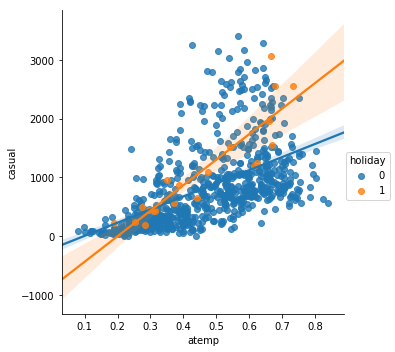

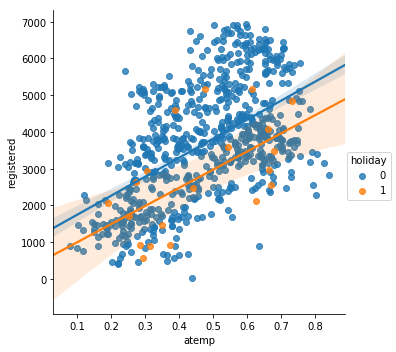

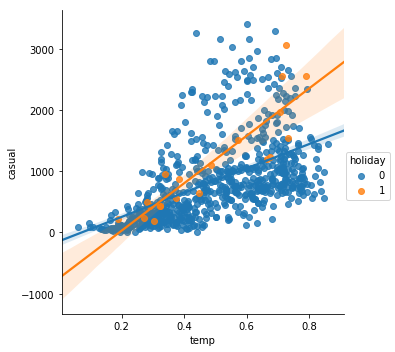

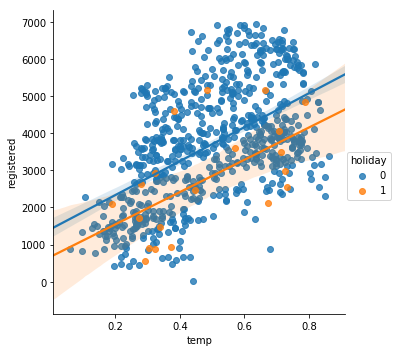

In [19]:
sns.lmplot( x="atemp",y="casual", hue = "holiday", data=df_bak)
sns.lmplot( x="atemp",y="registered", hue = "holiday", data=df_bak)
sns.lmplot( x="temp",y="casual", hue = "holiday", data=df_bak)
sns.lmplot( x="temp",y="registered", hue = "holiday", data=df_bak)


From the plot, we can find that if it is holiday, the "casual" is more positive related with "temp" and "atemp", it shows that the casual people are more willing to ride bike on holiday. but it seems that there is no difference between "holiday" and "not holiday" for registered people riding bike.

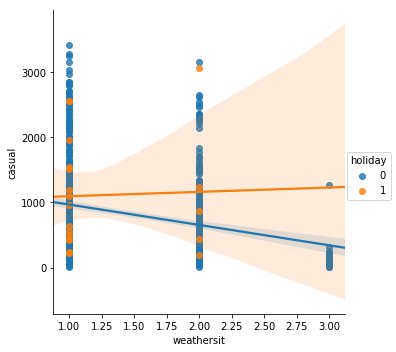

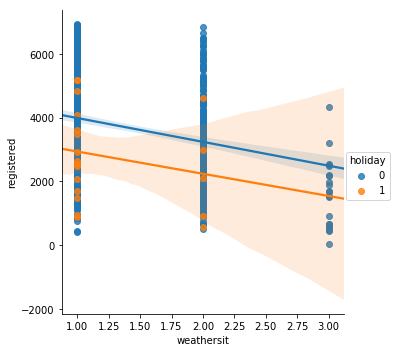

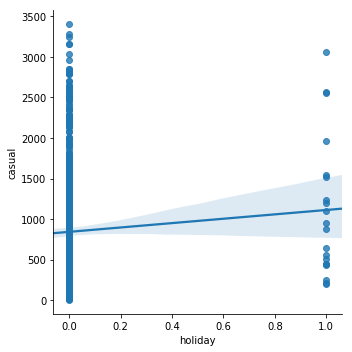

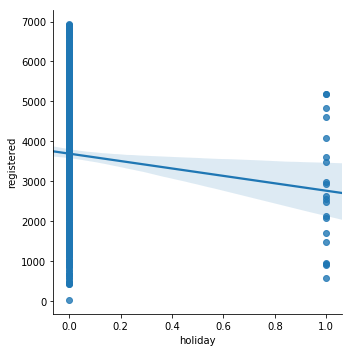

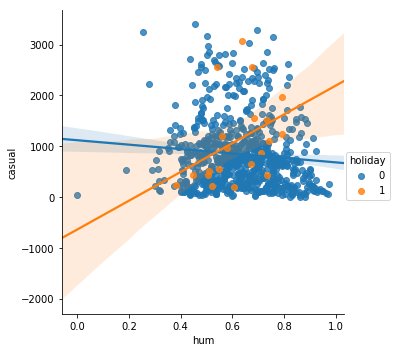

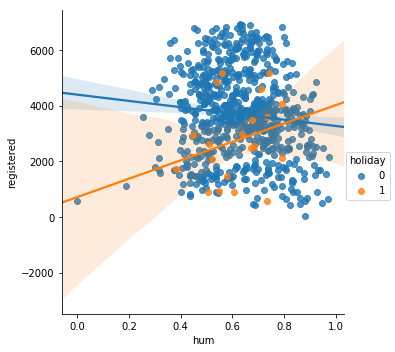

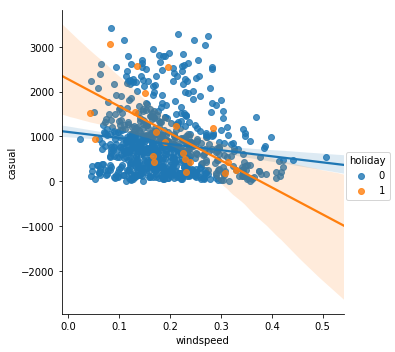

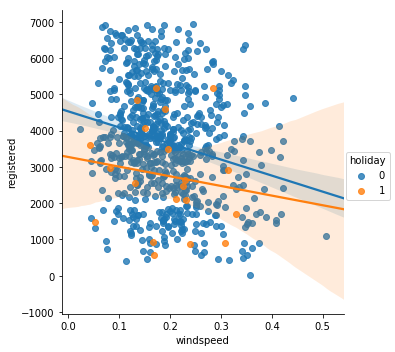

In [20]:
sns.lmplot(x="weathersit",y="casual", hue = "holiday", data=df_bak)
sns.lmplot( x="weathersit",y="registered", hue = "holiday", data=df_bak)
sns.lmplot( x="holiday", y="casual", data=df_bak)
sns.lmplot( x="holiday",y="registered",  data=df_bak)
sns.lmplot( x="hum",y="casual", hue = "holiday", data=df_bak)
sns.lmplot( x="hum",y="registered", hue = "holiday", data=df_bak)
sns.lmplot( x="windspeed",y="casual", hue = "holiday", data=df_bak)
sns.lmplot( x="windspeed",y="registered", hue = "holiday", data=df_bak)

We can find that the "casual" is postive related with "holiday", and "registered" is negative related with "holiday",besides, we can find that when it is holiday, the "casual" and "registered" are positive related with "hum". But when it is not holiday, the  "casual" and "registered" are negative related with "hum".

## Box-Plot

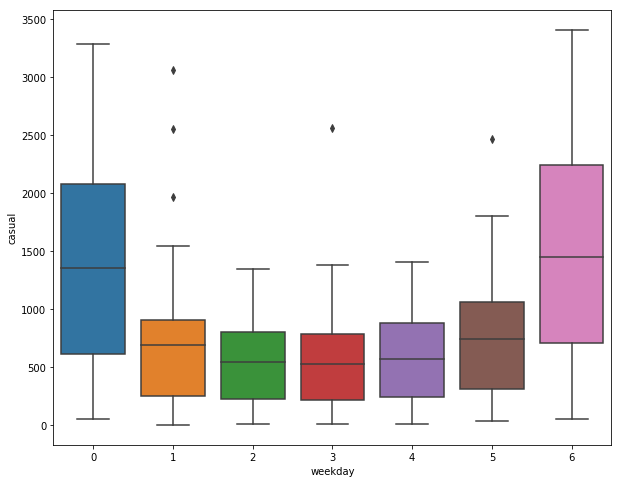

In [28]:
sns.boxplot(x="weekday", y="casual", data=df_bak)

The plot shows that the casual people are more willing to ride bike on Saturday and Sunday 

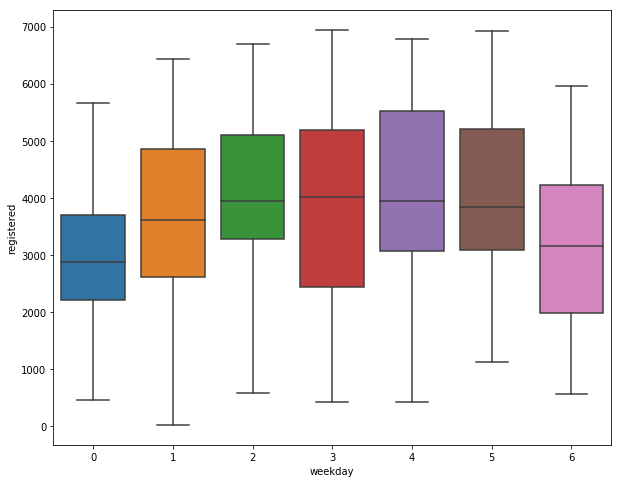

In [27]:
sns.boxplot(x="weekday", y="registered", data=df_bak)

But the registered people are more willing to ride bike on weekdays.

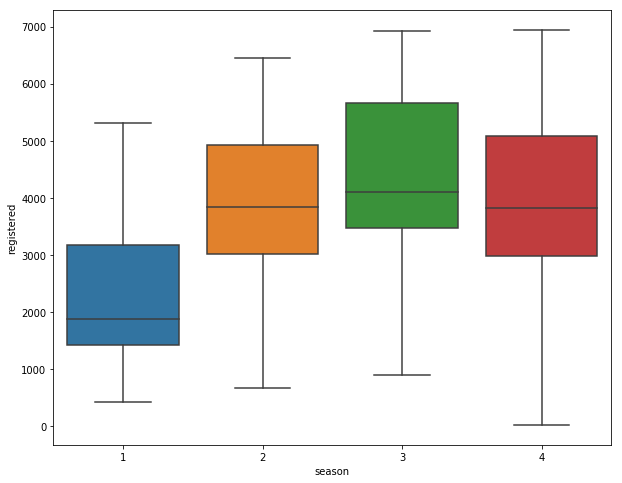

In [29]:
sns.boxplot(x="season", y="registered", data=df_bak)

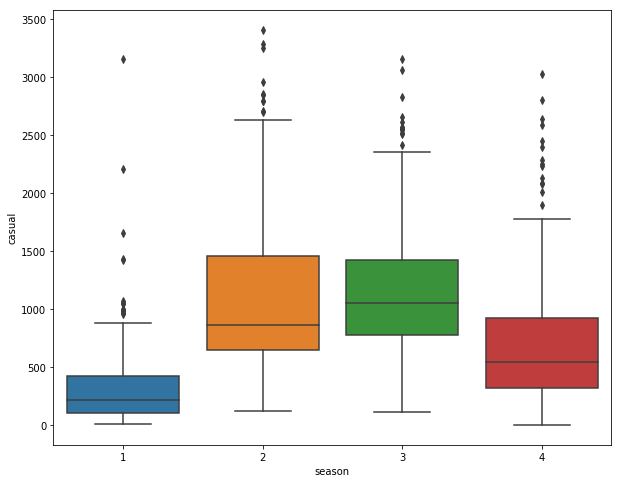

In [30]:
sns.boxplot(x="season", y="casual", data=df_bak)

And people are more willing to ride bike on summer and autumn.